In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot

In [2]:
from sklearn.datasets import fetch_mldata

In [5]:
mnist = fetch_mldata('MNIST Original')

In [13]:
X = mnist['data']
y = mnist['target']

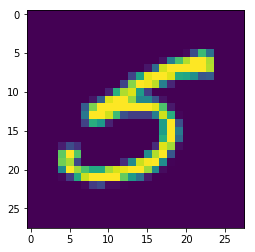

In [14]:
pyplot.imshow(X[34600].reshape(28,28))

In [11]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [16]:
from sklearn.linear_model import SGDClassifier

In [21]:
y_train_0 = (y_train==0)
y_test_0 = (y_test==0)

In [46]:
sgd = SGDClassifier(random_state=0,max_iter=20,tol=None)
sgd.fit(X_train,y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=20, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [47]:
y_train_pred = sgd.predict(X_train)

In [48]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [49]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [50]:
kfold = StratifiedKFold(n_splits=4,random_state=0)

for train_index,test_index in kfold.split(X_train,y_train_0):
    clone_clf = clone(sgd)
    x_train_fold = X_train[train_index]
    y_train_fold = y_train_0[train_index]
    x_test_fold = X_train[test_index]
    y_test_fold = y_train_0[test_index]
    clone_clf.fit(x_train_fold,y_train_fold)
    y_pred = clone_clf.predict(x_test_fold)
    matches = sum(y_pred==y_test_fold)
    score = matches/y_pred.size
    print ("{0:.3f}".format(score))
    

In [55]:
for train_index,test_index in kfold.split(X_train,y_train_0): 
    clone_clf = clone(sgd) 
    x_train_fold = X_train[train_index] 
    y_train_fold = y_train_0[train_index] 
    x_test_fold = X_train[test_index] 
    y_test_fold = y_train_0[test_index] 
    clone_clf.fit(x_train_fold,y_train_fold) 
    y_pred = clone_clf.predict(x_test_fold) 
    matches = sum(y_pred==y_test_fold) 
    score = matches/y_pred.size 
    print ("{0:.3f}".format(score))


0.979
0.985
0.988
0.984


# Something

# A markdown

In [63]:
cm = np.array([(950,50),(100,2345)])

In [64]:
cm

array([[ 950,   50],
       [ 100, 2345]])

In [60]:
from sklearn.metrics import recall_score,precision_score

In [62]:
precision_score(y_train_0,y_train_pred),recall_score(y_train_0,y_train_pred)

(0.9681338378809002, 0.9438834951456311)

In [65]:
from sklearn.model_selection import cross_val_predict

In [73]:
y_scores = cross_val_predict(sgd,X_train,y_train_0,cv=3,method='decision_function')

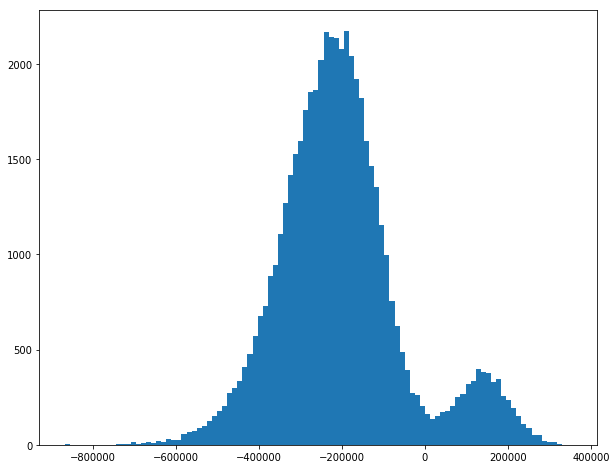

In [74]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
plt.hist(y_scores,bins=100)
plt.show()

In [75]:
from sklearn.metrics import precision_recall_curve

In [79]:
precision,recall,threshold = precision_recall_curve(y_train_0,y_scores)

In [88]:
def get_precision_recall_curve(precision,recall,threshold):
    plt.plot(threshold,precision[:-1],'b--',label='Precision')
    plt.plot(threshold,recall[:-1],'g--',label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([-0.5,1.5])

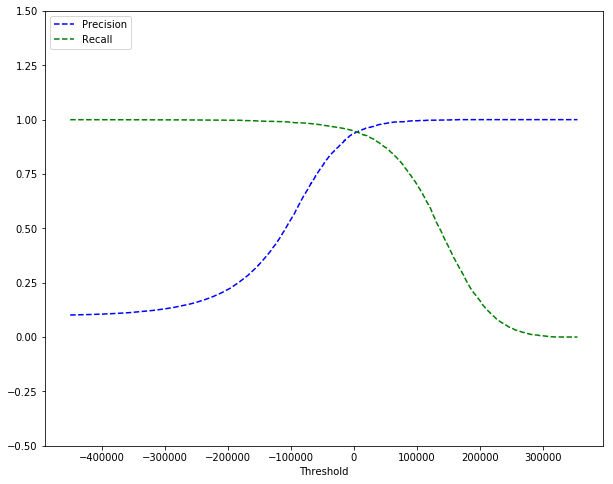

In [89]:
plt.figure(figsize=(10,8))
get_precision_recall_curve(precision,recall,threshold)
plt.show()